<a href="https://colab.research.google.com/github/JuanGans/PCVK_2024/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [ ]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)


  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return new_image

In [ ]:
original = cv.imread('/content/drive/MyDrive/PCVK/perempuan.tiff')
img = cv.resize(original, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

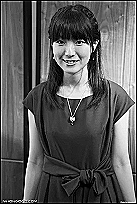

In [ ]:
kernal_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])
cv2_imshow(convolution2d(img_gray,kernal_sharpen,1,2))

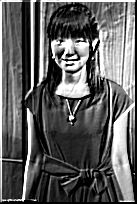

In [14]:
kernal_sobel = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

cv2_imshow(convolution2d(img_gray,kernal_sobel,1,2))

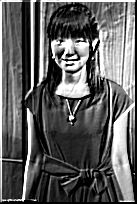

In [15]:
kernal_canny = np.array([[1,0,-1],
                          [2,0,-2],
                          [1,0,-1]])

cv2_imshow(convolution2d(img_gray,kernal_sobel,1,2))

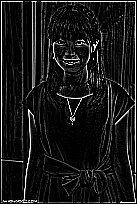

In [16]:
kernal_prewitt = np.array([[-1,-1,-1],
                          [-1,8,-1],
                          [-1,-1,-1]])

cv2_imshow(convolution2d(img_gray,kernal_prewitt,1,2))

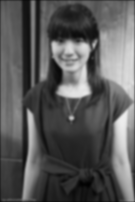

In [18]:
kernal_gaussian_blur_5 = np.array([[1, 4, 6, 4, 1],
                            [4, 16, 24, 16, 4],
                            [6, 24, 36, 24, 6],
                            [4, 16, 24, 16, 4],
                            [1, 4, 6, 4, 1]]) / 256

cv2_imshow(convolution2d(img_gray,kernal_gaussian_blur_5,1,2))

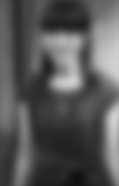

In [24]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray,gauss_kernel,1,2))